# Abalone case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.



In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [61]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Scatterplot

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

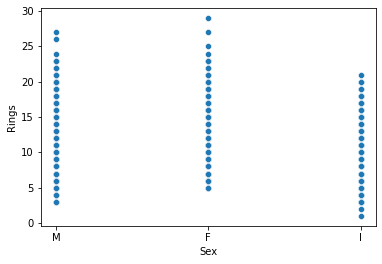

In [62]:
sns.scatterplot(x="Sex",y="Rings",data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

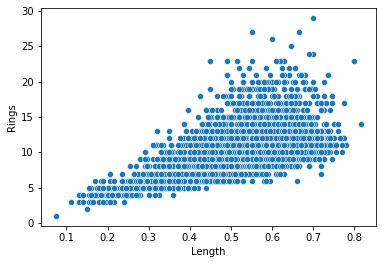

In [63]:
sns.scatterplot(x="Length",y="Rings",data=df)

Here, it is showing that the Length is increasing w.r.t. Rings.

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

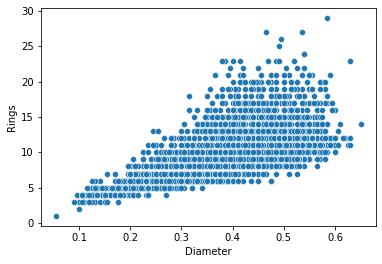

In [64]:
sns.scatterplot(x="Diameter",y="Rings",data=df)

Here, it is showing that the Diameter is increasing w.r.t. Rings.

<AxesSubplot:xlabel='Height', ylabel='Rings'>

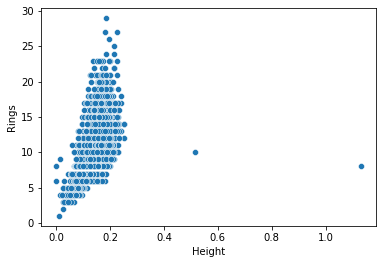

In [65]:
sns.scatterplot(x="Height",y="Rings",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

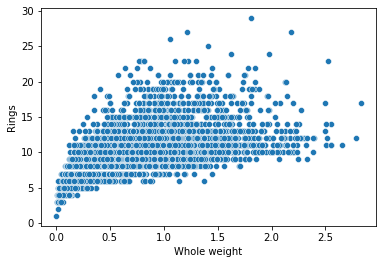

In [66]:
sns.scatterplot(x="Whole weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

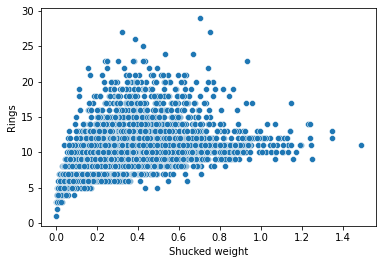

In [67]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

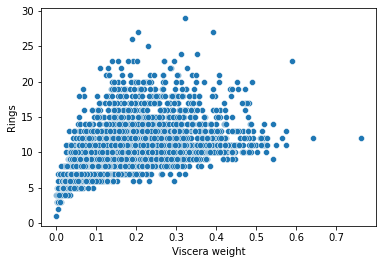

In [68]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

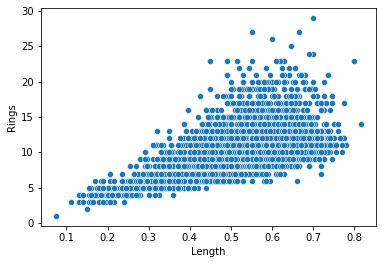

In [69]:
sns.scatterplot(x="Length",y="Rings",data=df)

# Correlation

In [70]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

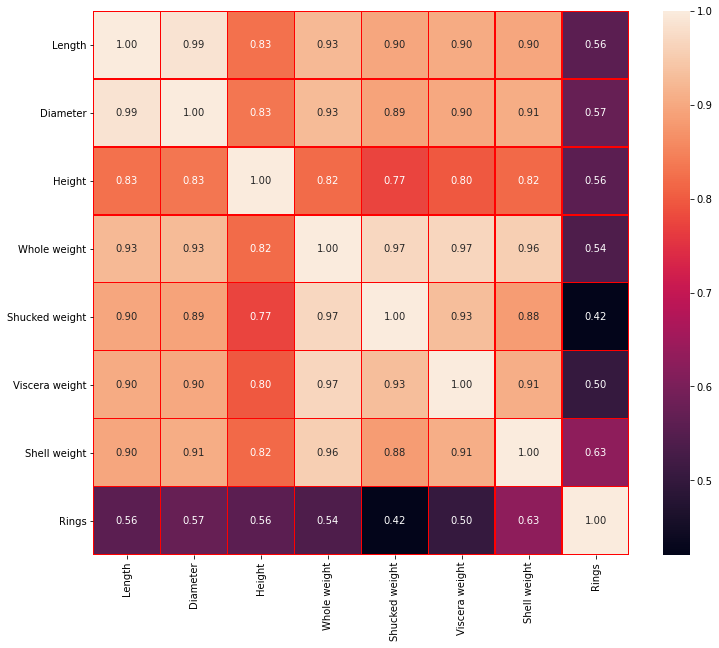

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5,linecolor='Red')

Correlation:
From the above result it is clear that all columns making positive correlation.

# DESCRIBE HEATMAP

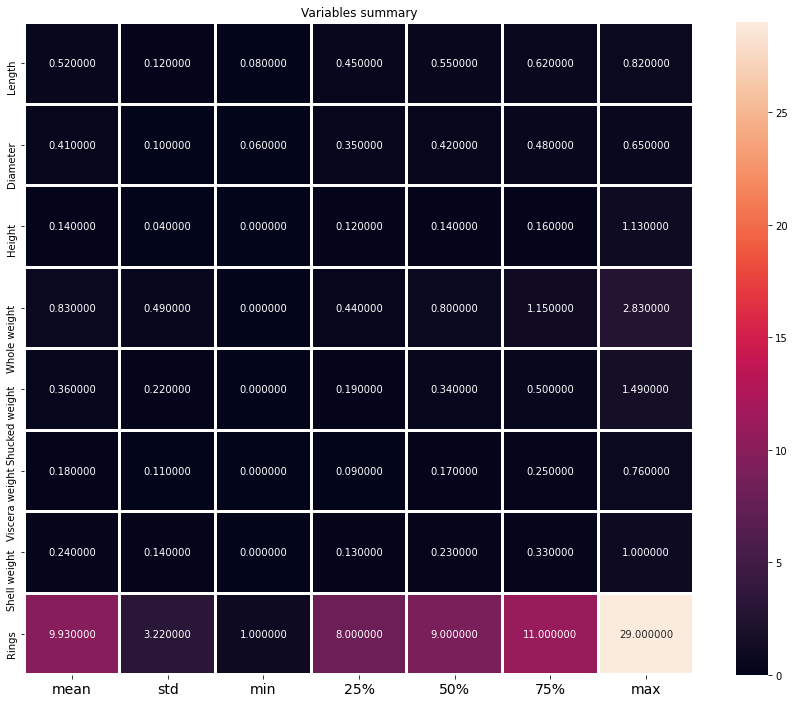

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.title("Variables summary")
plt.show()

DATASET DESCRIPTION

In [73]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

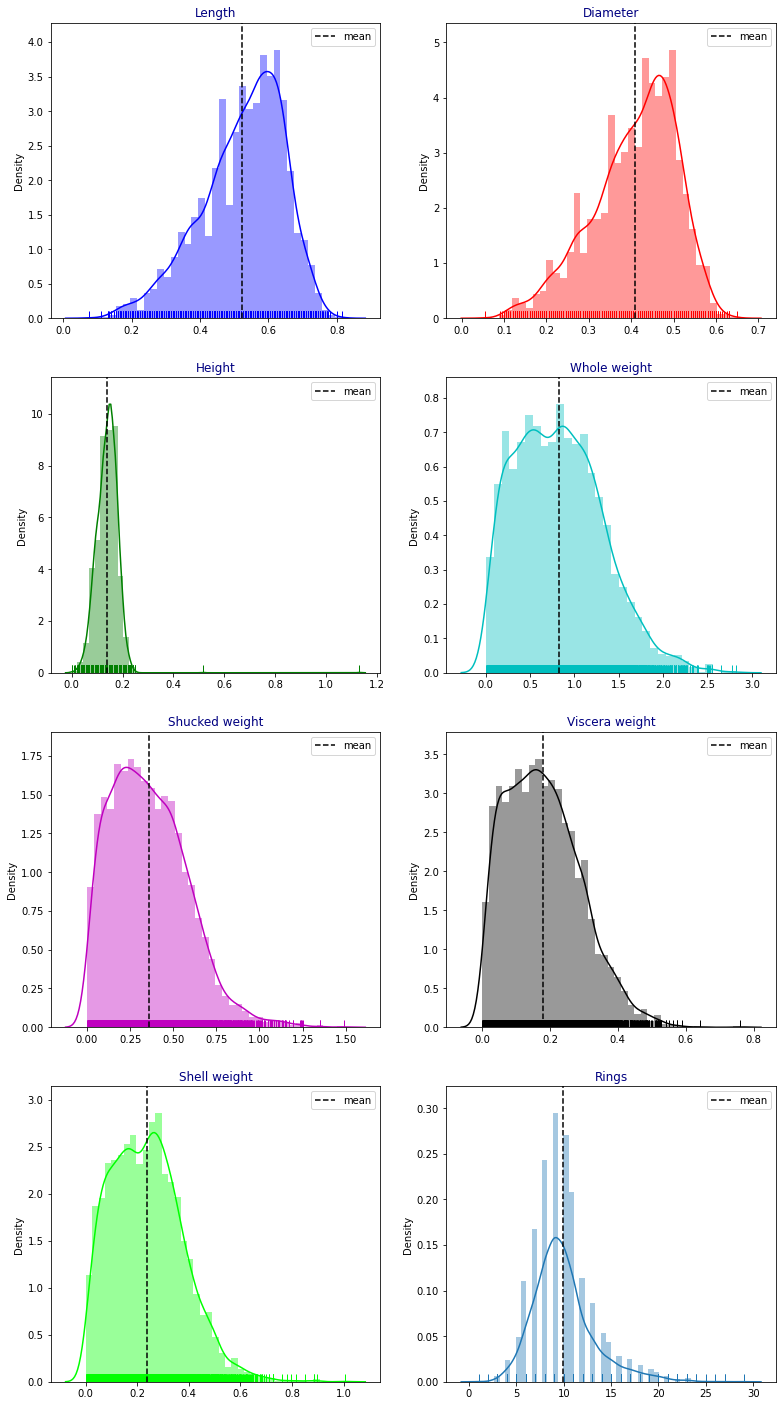

In [74]:
import itertools

cols = ['Length',
       'Diameter',
       'Height',
       'Whole weight',
       'Shucked weight',
       'Viscera weight',
       'Shell weight',
       'Rings']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations

From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

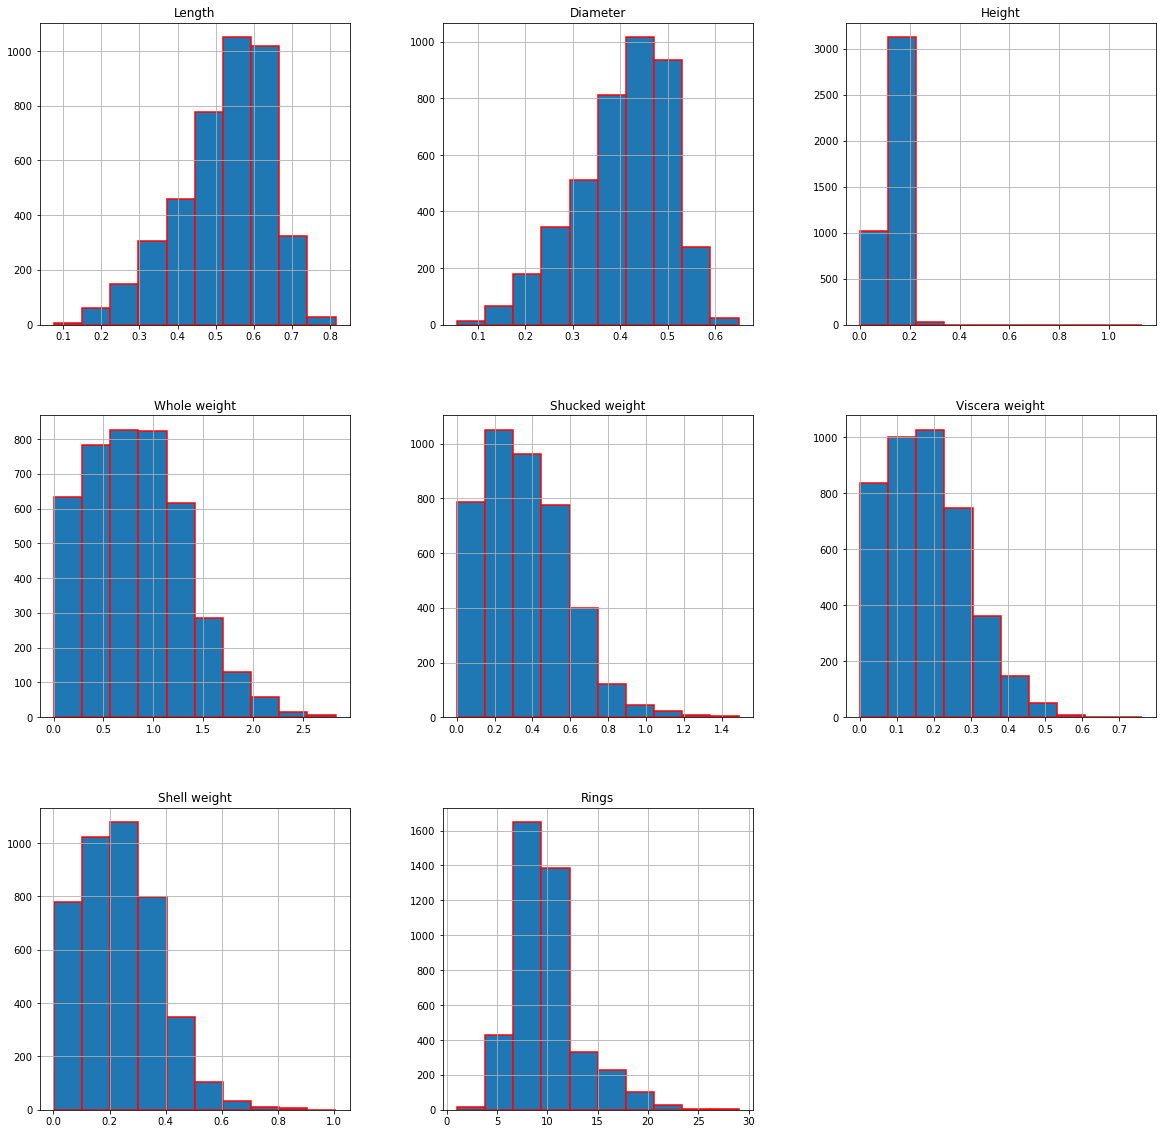

In [75]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [76]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [77]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

We have to check that there are any Outliers or not.

# Checking of Outliers

<AxesSubplot:>

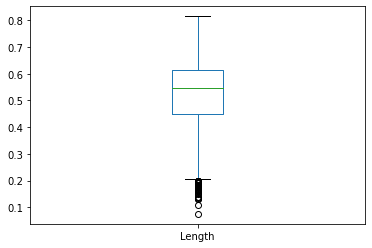

In [78]:
df['Length'].plot.box()

<AxesSubplot:>

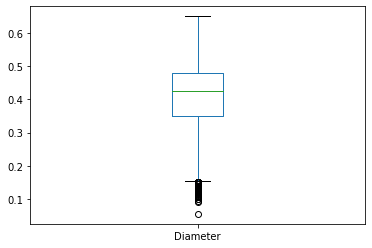

In [79]:
df['Diameter'].plot.box()

<AxesSubplot:>

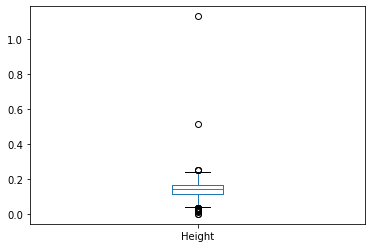

In [80]:
df['Height'].plot.box()

<AxesSubplot:>

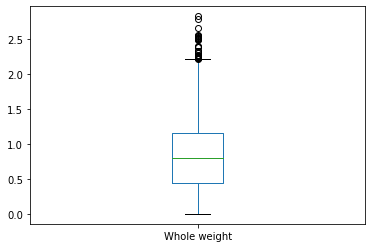

In [81]:
df['Whole weight'].plot.box()

<AxesSubplot:>

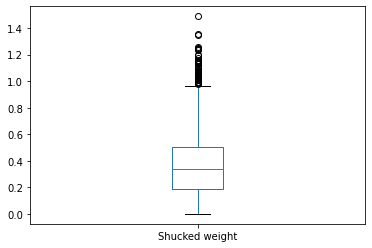

In [82]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

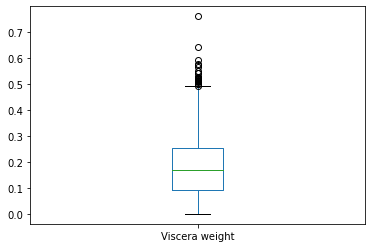

In [83]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

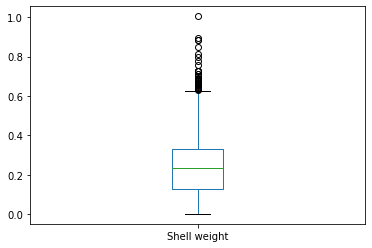

In [84]:
df['Shell weight'].plot.box()

<AxesSubplot:>

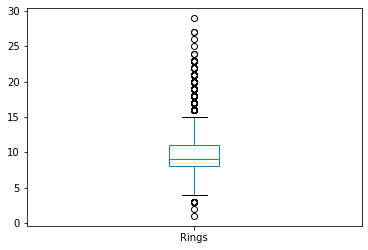

In [85]:
df['Rings'].plot.box()

In [86]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


In [87]:
df_new= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new.shape)

(3781, 9)


In [88]:
percentage_loss=((4177-3781)/4177)*100
print(percentage_loss)

9.480488388795786


In [89]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [108]:
lm=LinearRegression()
sc=StandardScaler()

In [109]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

ValueError: not enough values to unpack (expected 4, got 2)